# Simulating a model with MaBoSS

In [1]:
%matplotlib inline
import numpy as np
# import seaborn as sns; sns.set()

import ginsim
import biolqm
import maboss
from colomoto_jupyter import tabulate # for fixpoint table display
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states

In [2]:
from own_functions import *
from MaBoSSTestCase import *
import sys


## GINsim

In [3]:
lqm = biolqm.load("Charite.zginml")
fps = biolqm.fixpoints(lqm)
print(len(fps), "fixpoints")
pd.DataFrame(fps)

30 fixpoints


,Proliferation,Senescence,Apoptosis,FGFR,K_N_HRAS,BRAF,MEK,ERK_1_2,p38,CHEK1,MK2,CDC25B_C,CDC25A,CDK1,CDK2,IGFR,EGFR,JNK,ATR,ATM,CHEK2,mTORC1,EIF4EBP1,TP53,p21,CDK4_6,S6,AKT,PI3K,MTORC2,EGF,DSB_SSB,cPARP,CC3,HSP27,Wee1,PKMYT1,NFkB,PLK1,CLPSN,CASP3,CHUK,TGFb,TAK1,MYC
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,1
3,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1
4,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1
5,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1
6,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,1
7,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1
8,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1
9,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1


In [3]:
# Getting the list of nodes
nodes = list(fps[0].keys())

# Building a 2D numpy array with the nodes order defined above, with each fixpoint value
data = np.array([[fp[node] for node in nodes] for fp in fps])

# The array is XX fixpoints * XX nodes
data.shape

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

# Getting the new coordinates
X_pca = pca.transform(data)

Text(0, 0.5, 'PC2: 14.73% variance explained')

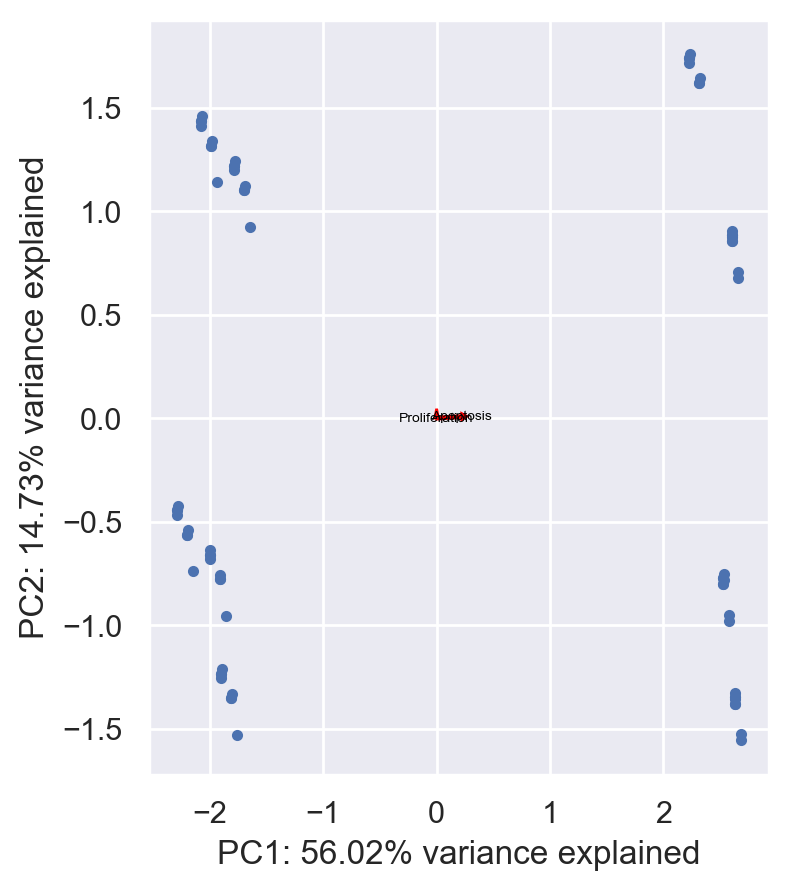

In [5]:
# Plotting the steady states
plt.figure(figsize=(4, 5), dpi=200)
plt.plot(X_pca[:, 0], X_pca[:, 1], ".")

# Printing arrows, but there is too much. We need to select some nodes
#some_nodes = ["EGFR", "TP53","CDK1"]
some_nodes = ["Proliferation", "Apoptosis","NFkB"]
for some_node in some_nodes:

    v = pca.components_[0:2, nodes.index(some_node)].T
    plt.arrow(0, 0, v[0], v[1], color='red', width=0.01)
    plt.text(v[0], v[1], some_node, color='black', ha='center', va='center', fontsize=5)

    
plt.xlabel("PC1: %.2f%% variance explained" % (100*pca.explained_variance_ratio_[0]))
plt.ylabel("PC2: %.2f%% variance explained" % (100*pca.explained_variance_ratio_[1]))

Visualize the GINsim network if available

In [6]:
ginsim_WT = ginsim.load("Charite.zginml")

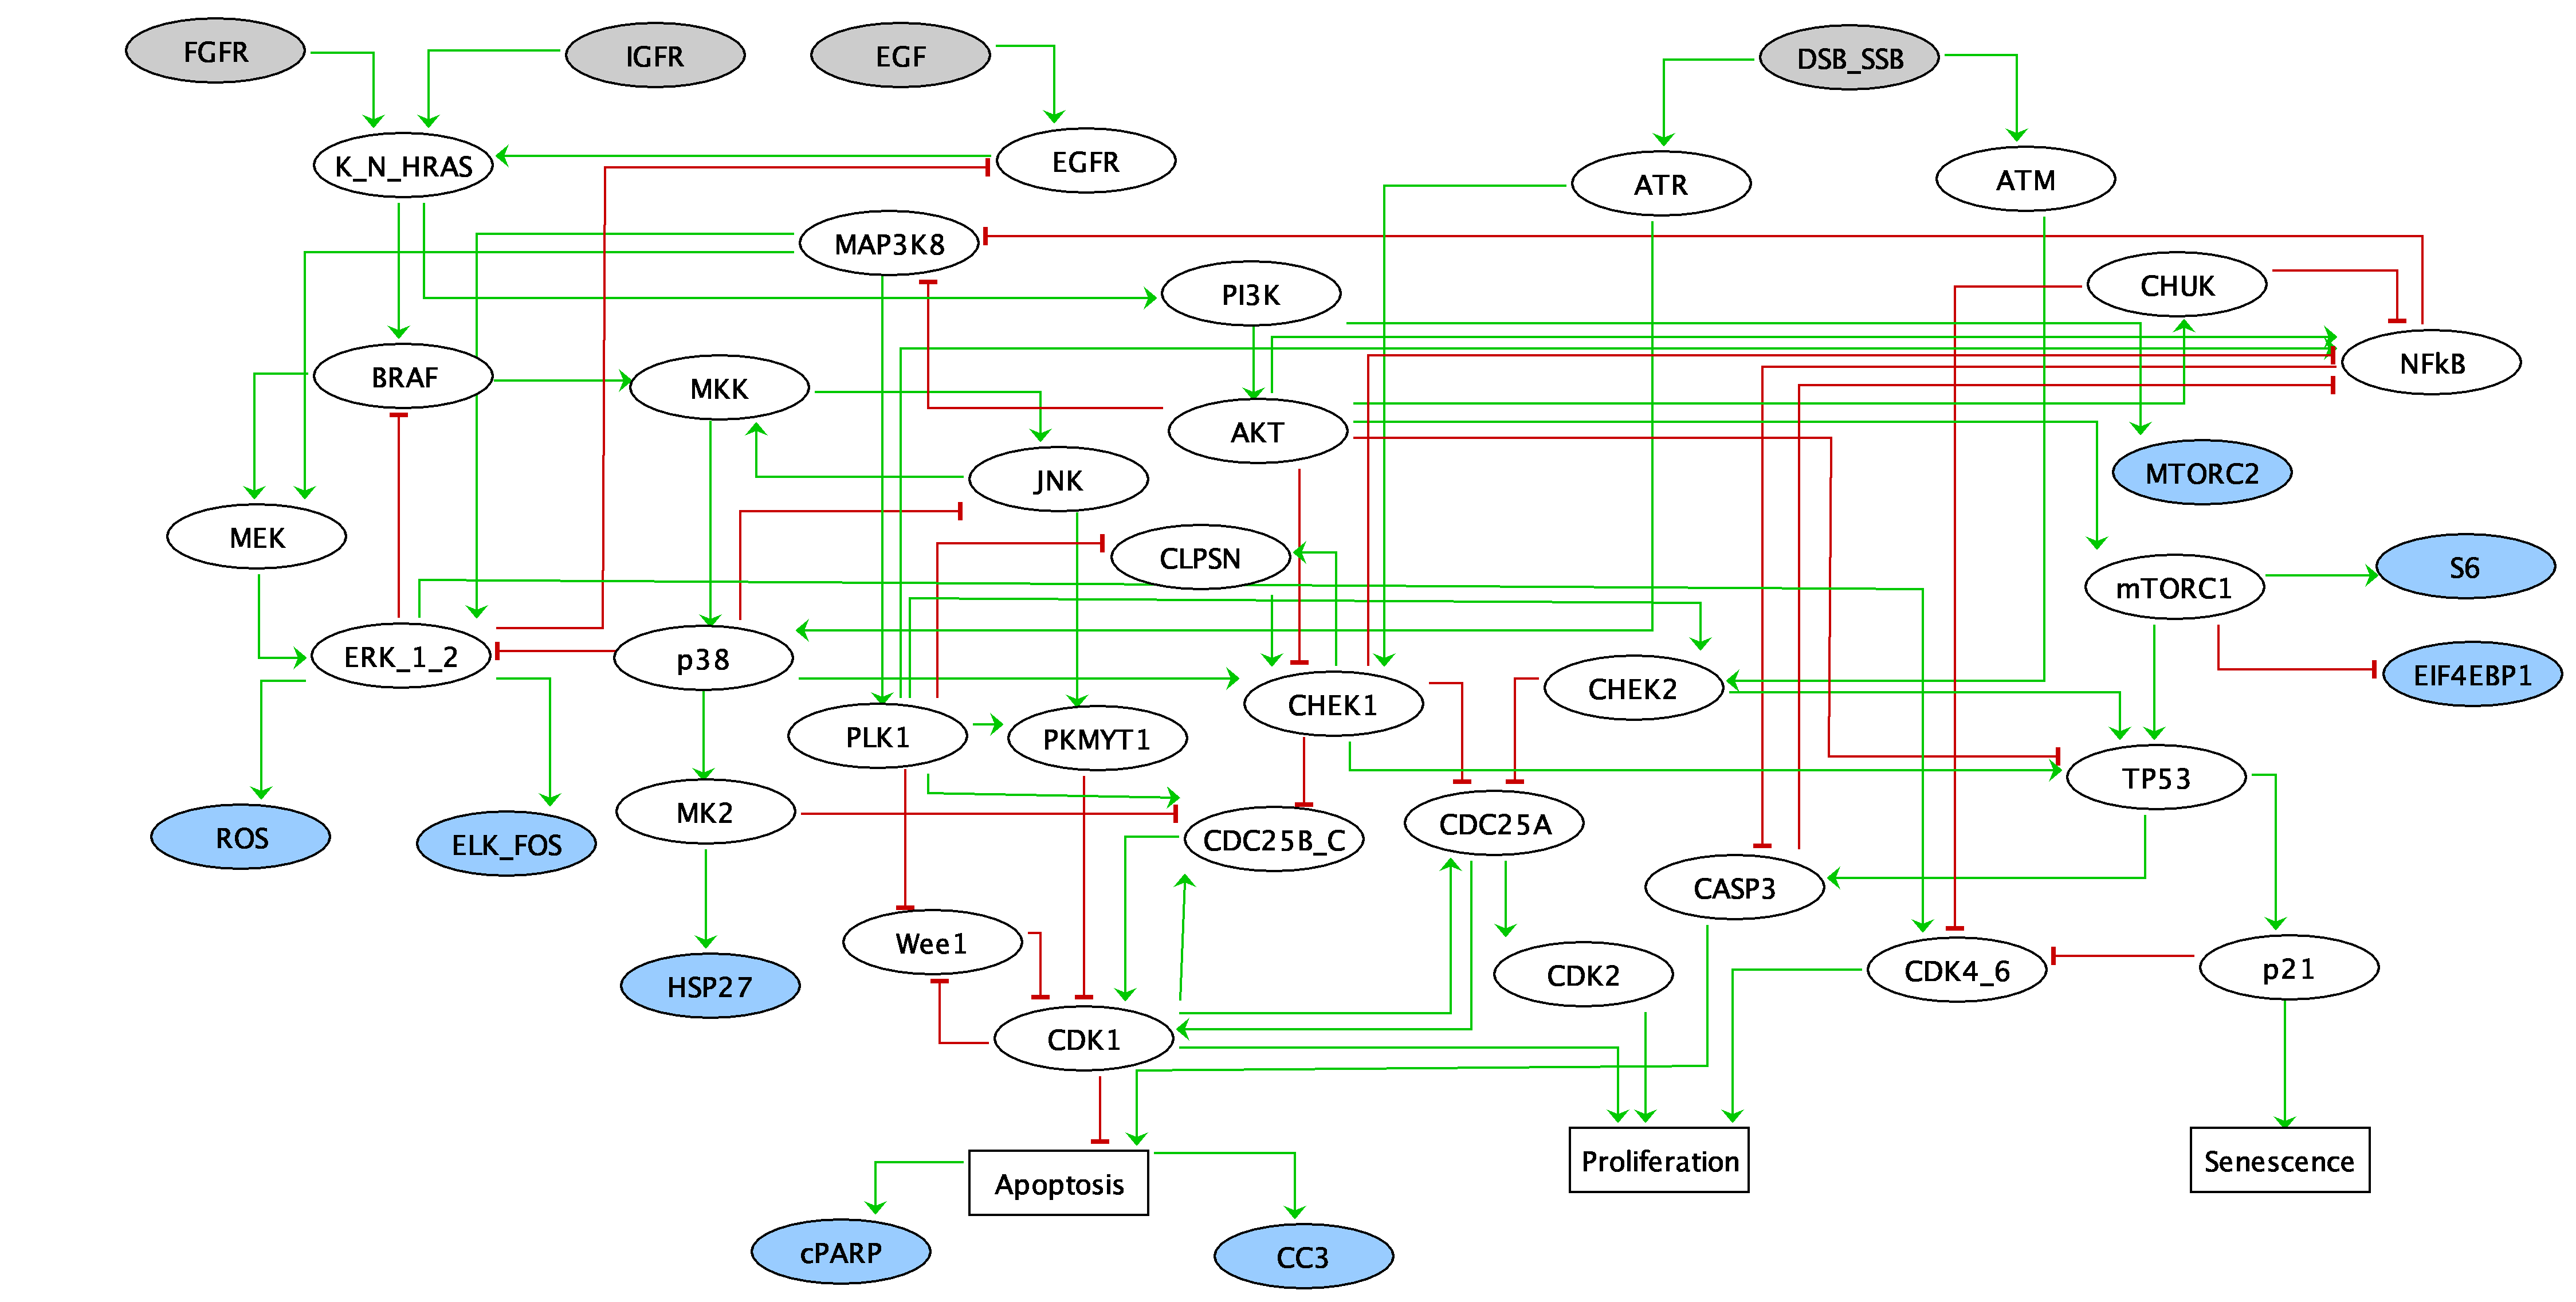

In [7]:
ginsim.show(ginsim_WT)

## MaBoSS simulation of the wild type model

Run MaBoSS now. The files used are:
*model.bnd* and *model.cfg*

In [7]:
## Set up the required files
bnd_file ="Charite.bnd"
cfg_WT = "Charite.bnd.cfg"

Load the model with either all 0s or random initial conditions and modify some configuration parameters. Note that if you used the export of GINsim export, all the initial values will be set to 0

In [8]:
## Load the Wild-Type model
WT = maboss.load(bnd_file, cfg_WT)

## modify the max_time if necessary
## select the variables considered to be internal (not appearing in the resulting csv file) 
## run the model for random initial conditions (defined in the cfg file) or from all 0s initial conditions 

WT_allinputs=maboss.copy_and_update_parameters(WT, {'max_time':50})

## By default, all variables are external (in the cfg file: Node.is_internal = FALSE). 
## If the model is big, the computations may take a very long time.
## We advise to set as external, only the variables that are relevant for the analysis

## if you wish to put some values as internal (the ones that will not be used for the analysis), write (uncomment):
for name in "ERK_1_2 MK2 p38 Wee1 BRAF CDK1 p21 TP53 Proliferation Senescence Apoptosis mTORC1".split(' '):
    WT_allinputs.network[name].is_internal = True

Select the read-outs from the nodes of the model

In [9]:
## Select outputs for visualisation of the results
#WT_allinputs.network.set_output(('Proliferation','Senescence','Apoptosis'))
WT_allinputs.network.set_output(('BRAF','CDK1','TP53'))

WT_allinputs.network.set_istate('FGFR',[0.5,0.5])
WT_allinputs.network.set_istate('EGF',[0.5,0.5])
WT_allinputs.network.set_istate('IGFR',[0.5,0.5])
WT_allinputs.network.set_istate('DSB_SSB',[0.5,0.5])

In [10]:
## Run a MaBoSS simulation
run_WT_allinputs = WT_allinputs.run()

Text(0.5, 1.0, 'WT pie chart')

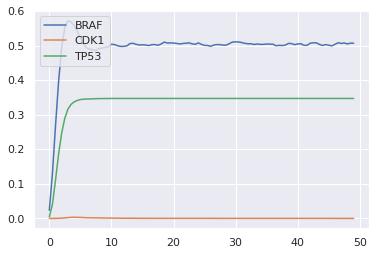

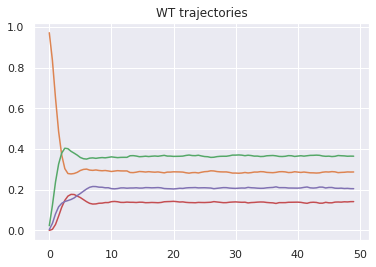

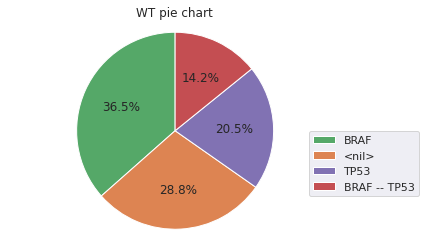

In [11]:
## Plot the results of the WT simulation
run_WT_allinputs.get_nodes_probtraj().plot(legend=True)
run_WT_allinputs.plot_trajectory(legend=False)
plt.title('WT trajectories')

## Note that the model state <nil> means that none of the external variables are ON. 

## You may want to save the figure
# figure = run_WT_allinputs.get_states_probtraj().plot()
# save_figure(figure, 'WT')

# Plot pie chart
run_WT_allinputs.plot_piechart()
plt.title('WT pie chart')

Text(0.5, 1.0, 'WT pie chart')

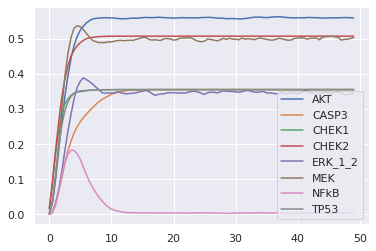

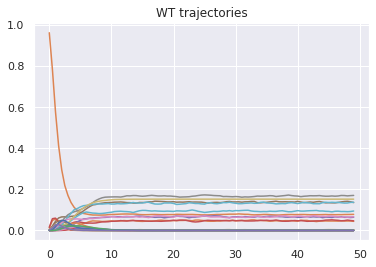

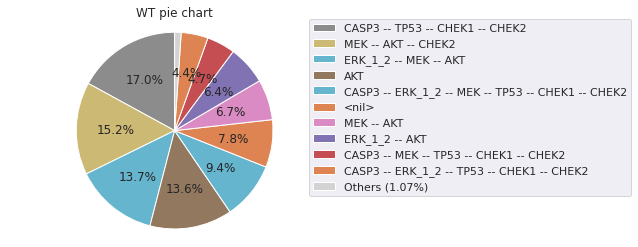

In [12]:
## Select outputs for visualisation of the results
#WT_allinputs.network.set_output(('Proliferation','Senescence','Apoptosis'))
WT_allinputs.network.set_output(('CHEK1','CHEK2','AKT','MEK','NFkB','TP53','ERK_1_2','CASP3'))

WT_allinputs.network.set_istate('FGFR',[0.5,0.5])
WT_allinputs.network.set_istate('EGF',[0.5,0.5])
WT_allinputs.network.set_istate('IGFR',[0.5,0.5])
WT_allinputs.network.set_istate('DSB_SSB',[0.5,0.5])

## Run a MaBoSS simulation
run_WT_allinputs = WT_allinputs.run()

## Plot the results of the WT simulation
run_WT_allinputs.get_nodes_probtraj().plot(legend=True)
run_WT_allinputs.plot_trajectory(legend=False)
plt.title('WT trajectories')
# Plot pie chart
run_WT_allinputs.plot_piechart()
plt.title('WT pie chart')

# Simulations of different inputs

We now wish to explore the effect of some input activation on the final probabilities

Set all inputs at 0 to explore the effect of individual input

In [18]:
# Set conditions for simulations

##### Set some nodes to 0 as initial conditions #####
## if all nodes are random and you wish to set only the initial conditions and outputs to 0
WT_allinputs_random = maboss.copy_and_update_parameters(WT_allinputs, {'max_time':50})
#for name in "Input1 Input2 Input 3 Output 1 Outpu2".split(' '):
#    WT_allinputs0.network.set_istate(name, [1,0]) 
    
##### Set all nodes to 0 as initial conditions #####
## if you wish to set, for all nodes of the network, the initial state to 0:
# for n in WT.network:
#    WT_allinputs0.network.set_istate(n,[1,0])

WT_allinputs_random.network.set_output(('BRAF','CDK1','TP53'))

##### Set all nodes random as initial conditions #####
## if the initial state of all nodes of the network are 0 and you wish them to be all random:
for n in WT.network:
    WT_allinputs_random.network.set_istate(n,[0.5,0.5])

In [19]:
## Run model
run_WT_allinputs_random = WT_allinputs_random.run()

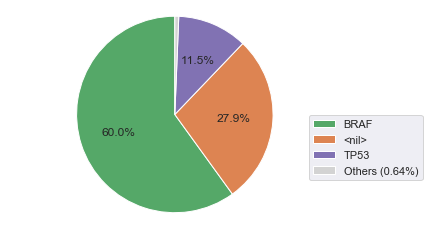

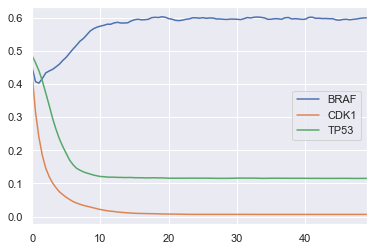

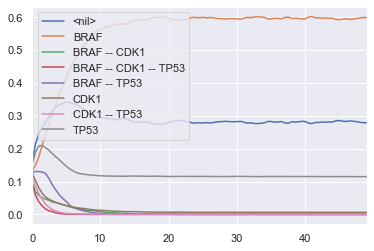

In [20]:
## Visualize the results

## As a pie chart
run_WT_allinputs_random.plot_piechart()

## Trajectories of node probabilities
run_WT_allinputs_random.get_nodes_probtraj().plot(legend=True)

## Trajectories of model states
run_WT_allinputs_random.get_states_probtraj().plot(legend=True)

Simulations for different initial conditions as inputs ON 

In [27]:
## Model with different initial conditions
WT_cond1 = WT_allinputs.copy()

## To test combinations of inputs, include all lines
WT_cond1.network.set_istate('EGF', [0,1])
WT_cond1.network.set_istate('DSB_SSB', [1,0])

In [28]:
## Visualize only the selected phenotypes
WT_cond1.network.set_output(('Proliferation','Apoptosis','Senescence'))
run_cond1 = WT_cond1.run()

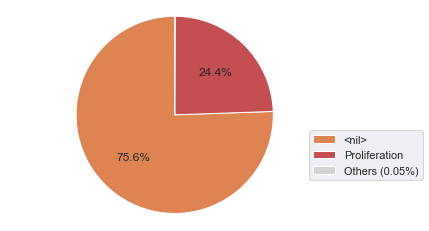

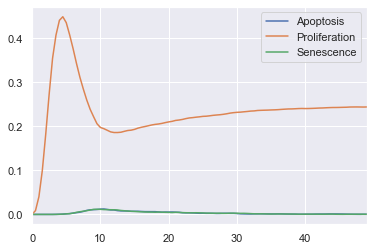

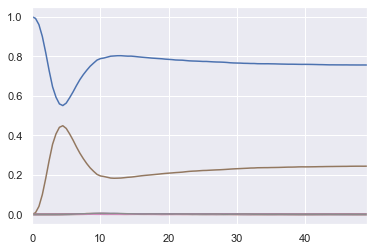

In [29]:
## Plot pie chart
run_cond1.plot_piechart()

## Plot the trajectories
run_cond1.get_nodes_probtraj().plot(legend=True)
run_cond1.get_states_probtraj().plot(legend=False)

We tested several combinations of inputs and if there are no DNA damage, cells can proliferate, otherwise, they go into apoptosis. 
75% of the simulations have no phenotypes

## Mutant simulations 

Simulate gain of function

Text(0.5, 1.0, 'BRAF mutant')

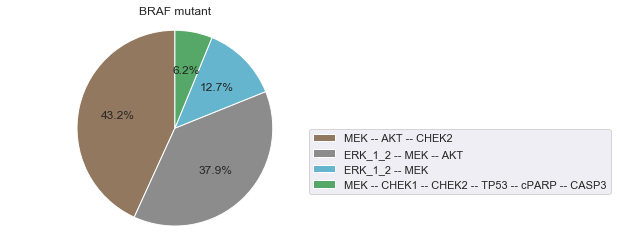

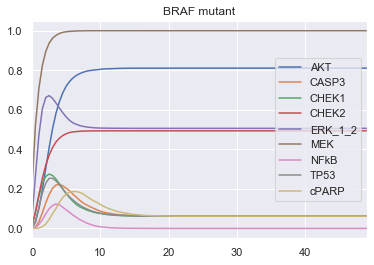

In [48]:
## Visualize only the selected phenotypes
WT_allinputs.network.set_output(('CHEK1','CHEK2','AKT','MEK','NFkB','TP53','ERK_1_2','CASP3','cPARP'))

## Gain of function for node 1
mut_BRAF_ON = WT_allinputs.copy()
mut_BRAF_ON.mutate("BRAF", "ON")
mutres_BRAF_ON = mut_BRAF_ON.run()
mutres_BRAF_ON.plot_piechart()
plt.title('BRAF mutant')
mutres_BRAF_ON.get_nodes_probtraj().plot(legend=True)
plt.title('BRAF mutant')


## Drug treatments

MEK1 inhibitors

Text(0.5, 1.0, 'MEKi')

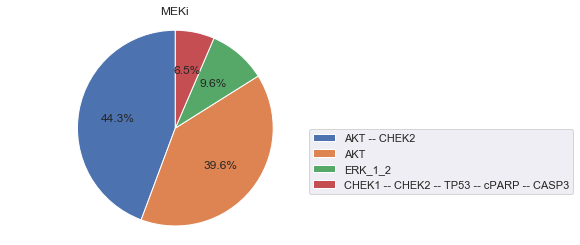

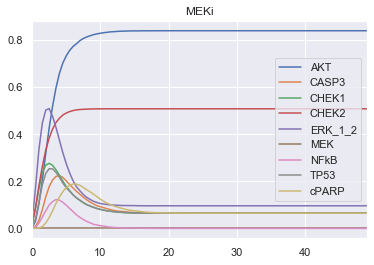

In [51]:
## Inhibition of MEK
mut_MEKi = mut_BRAF_ON.copy()
mut_MEKi.mutate("MEK", "OFF")
mutres_MEKi = mut_MEKi.run()
mutres_MEKi.plot_piechart()
plt.title('MEKi')
mutres_MEKi.get_nodes_probtraj().plot(legend=True)
plt.title('MEKi')

CHEK1 inhibitors

Text(0.5, 1.0, 'CHEKi')

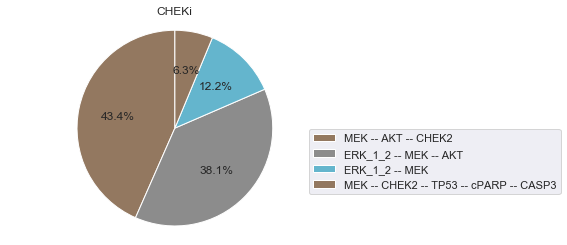

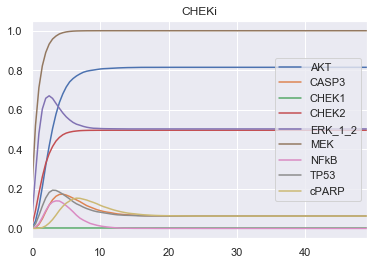

In [52]:
## Inhibition of CHEK1
mut_CHEKi = mut_BRAF_ON.copy()
mut_CHEKi.mutate("CHEK1", "OFF")
mutres_CHEKi = mut_CHEKi.run()
mutres_CHEKi.plot_piechart()
plt.title('CHEKi')
mutres_CHEKi.get_nodes_probtraj().plot(legend=True)
plt.title('CHEKi')

CHEK1 and MEK inhibitors

Text(0.5, 1.0, 'CHEKi')

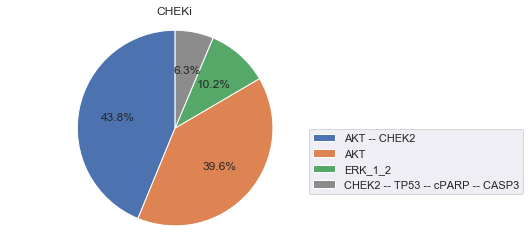

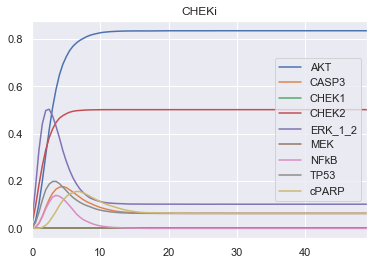

In [53]:
## Inhibition of CHEK1 and MEK
mut_CHEKi = mut_MEKi.copy()
mut_CHEKi.mutate("CHEK1", "OFF")
mutres_CHEKi = mut_CHEKi.run()
mutres_CHEKi.plot_piechart()
plt.title('MEKi CHEKi')
mutres_CHEKi.get_nodes_probtraj().plot(legend=True)
plt.title('MEKi CHEKi')

Text(0.5, 1.0, 'MEKi CHEKi')

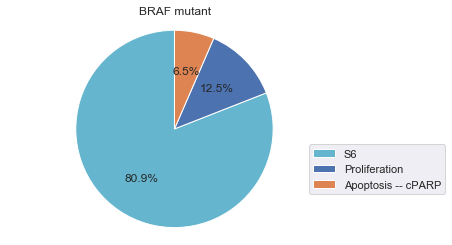

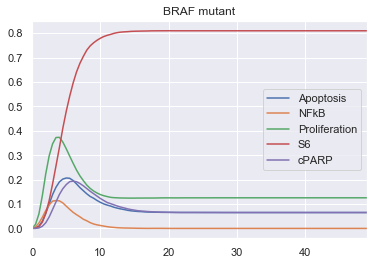

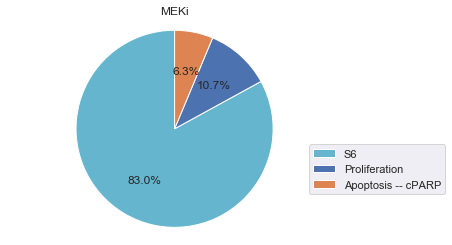

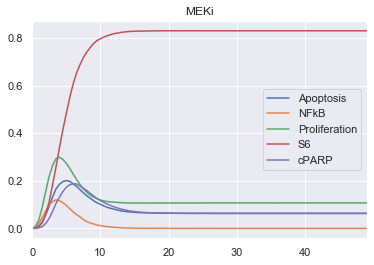

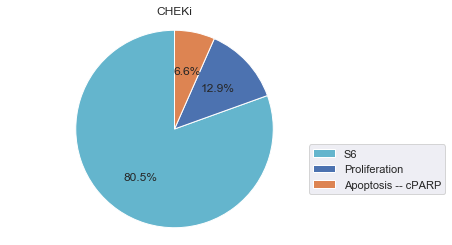

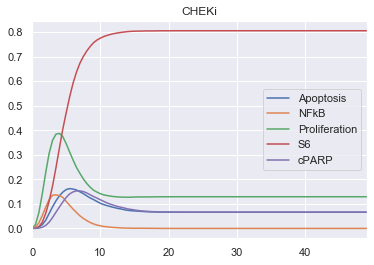

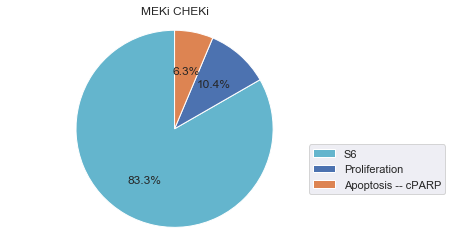

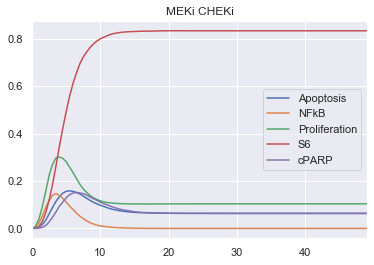

In [54]:
## Visualize only the selected phenotypes
WT_allinputs.network.set_output(('Proliferation','Apoptosis','NFkB','cPARP','S6'))

## Gain of function for node 1
mut_BRAF_ON = WT_allinputs.copy()
mut_BRAF_ON.mutate("BRAF", "ON")
mutres_BRAF_ON = mut_BRAF_ON.run()
mutres_BRAF_ON.plot_piechart()
plt.title('BRAF mutant')
mutres_BRAF_ON.get_nodes_probtraj().plot(legend=True)
plt.title('BRAF mutant')

## Inhibition of MEK
mut_MEKi = mut_BRAF_ON.copy()
mut_MEKi.mutate("MEK", "OFF")
mutres_MEKi = mut_MEKi.run()
mutres_MEKi.plot_piechart()
plt.title('MEKi')
mutres_MEKi.get_nodes_probtraj().plot(legend=True)
plt.title('MEKi')

## Inhibition of CHEK1
mut_CHEKi = mut_BRAF_ON.copy()
mut_CHEKi.mutate("CHEK1", "OFF")
mutres_CHEKi = mut_CHEKi.run()
mutres_CHEKi.plot_piechart()
plt.title('CHEKi')
mutres_CHEKi.get_nodes_probtraj().plot(legend=True)
plt.title('CHEKi')

## Inhibition of CHEK1 and MEK
mut_CHEKi = mut_MEKi.copy()
mut_CHEKi.mutate("CHEK1", "OFF")
mutres_CHEKi = mut_CHEKi.run()
mutres_CHEKi.plot_piechart()
plt.title('MEKi CHEKi')
mutres_CHEKi.get_nodes_probtraj().plot(legend=True)
plt.title('MEKi CHEKi')

## Unit Testing

In [131]:
# import maboss
import maboss_test
# from IPython.display import Image

In [ ]:
test = maboss_test.MaBoSSTestCase(mut_BRAF)

In [ ]:
SW620_Cheki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}
SW620_Meki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}
SW620_Cheki_Meki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}

SW480_Cheki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}
SW480_Meki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}
SW480_Cheki_Meki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}

HCT116_Cheki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}
HCT116_Meki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}
HCT116_Cheki_Meki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}

Caco2_Cheki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}
Caco2_Meki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}
Caco2_Cheki_Meki = {'CHEK2':1, 'CASP3':1,'cPARP':1,'ERK_1_2':1, 'MEK1':1, 'AKT':1, 'p38':1, 'Proliferation':1, 'NFkB':1, 'TP53':1, 'S6':1}


In [ ]:
test.assertStableStateProbability({'CHEK1':'OFF'}, W620_Cheki:'stable')
test.assertStableStateProbability({'MEK1':'OFF'}, W620_Meki:'stable')
test.assertStableStateProbability({'CHEK1':'OFF', 'MEK1':'OFF'}, W620_Cheki_Meki:'stable')

## Automatic single mutant simulations

NB: This step needs to be adapted. If you sleect too many nodes, there will be too many plots and the notebook may not handle it. 

In [ ]:
import matplotlib.pyplot as plt # for customizing the plots

In [ ]:
## If you wish to exclude only some nodes from the all list of variables:
excluded = set( ('FGFR', 'IGFR', 'EGF', 'DSB_SSB', 'Apoptosis','Proliferation','Senescence', 'HSP27','ROS','ELK_FOS','cPARP','CC3', 'EIF4EBP1','S6','MTORC2') )
nodes = [ n for n in WT_allinputs.network.names if n not in excluded ]
nodes.sort()

## if you wish to ony select few nodes:
#nodes = ['Node1','Node2','Node3','Node4']

WTallinputs.set_output(('Proliferation','Apoptosis', 'NFkB'))

In [ ]:
# Simulate genes with loss of function
for mutant in nodes:
    print(mutant, end=' ')
    mut_sim = WT_allinputs.copy()
    mut_sim.mutate(mutant, "OFF")
    mut_res = mut_sim.run()
    mut_res.plot_piechart(embed_labels=False, autopct=4)
    plt.title("%s mutant" % mutant)

In [ ]:
# Libraries for creating combinations of mutants
from itertools import combinations
from functools import reduce

# Create double mutants
mutant_combinations = [combinations(m.items(), 2) for m in mutant if len(m) >= 2]
combinations = reduce(set.union, mutant_combinations, set())
combinations

# Simulate double mutants
for mutant in sorted(combinations):
    mut_sim_double = WT_allinputs.copy()
    for (node, value) in mutant:
        mut_sim_double.mutate(node, "ON" if value else "OFF")
    mut_double_res = mut_sim_double.run()
    mut_double_res.plot_piechart(embed_labels=False, autopct=4)
    mutant_name = "/".join(["%s:%s"%m for m in mutant])
    plt.title("%s mutant" % mutant_name)

# REDUCED model

In [3]:
# masim = maboss.load("../../exastolog/model_files/krasreduced.bnd",\
#                    "../../exastolog/model_files/reduced.bnd.cfg") # krasreduced_simplif
bnd_file="../../exastolog/model_files/krasreduced_simplif.bnd"; 
cfg_WT="../../exastolog/model_files/reduced.bnd.cfg"
## Load the Wild-Type model
WT = maboss.load(bnd_file, cfg_WT)

## modify the max_time if necessary
## select the variables considered to be internal (not appearing in the resulting csv file) 
## run the model for random initial conditions (defined in the cfg file) or from all 0s initial conditions 

WT_allinputs=maboss.copy_and_update_parameters(WT, {'max_time':50})

## By default, all variables are external (in the cfg file: Node.is_internal = FALSE). 
## If the model is big, the computations may take a very long time.
## We advise to set as external, only the variables that are relevant for the analysis

## if you wish to put some values as internal (the ones that will not be used for the analysis), write (uncomment):
for name in "ERK MK2 p38 Wee1 BRAF CDK1 TP53 Proliferation CASP3".split(' '):
    WT_allinputs.network[name].is_internal = True


## Select outputs for visualisation of the results
#WT_allinputs.network.set_output(('Proliferation','Senescence','Apoptosis'))
WT_allinputs.network.set_output(('BRAF','CDK1','TP53'))

WT_allinputs.network.set_istate('EGFR',[0.5,0.5])
WT_allinputs.network.set_istate('EGF',[0.5,0.5])
WT_allinputs.network.set_istate('GF',[0.5,0.5])
# WT_allinputs.network.set_istate('IGFR',[0.5,0.5])
WT_allinputs.network.set_istate('ATM_ATR',[0.5,0.5])

Text(0.5, 1.0, 'WT pie chart')

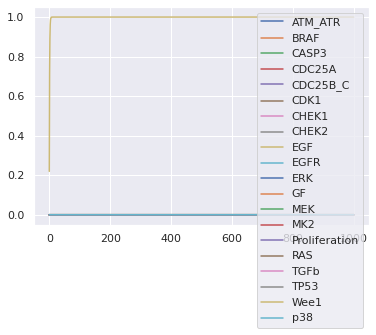

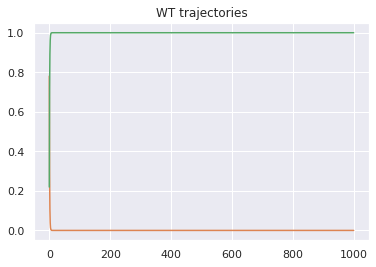

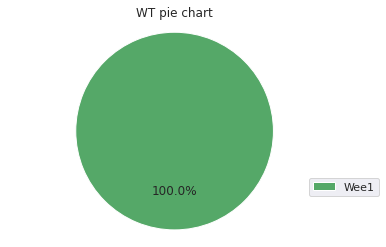

In [57]:
## Run a MaBoSS simulation
run_WT_allinputs = WT.run()
## Plot the results of the WT simulation
run_WT_allinputs.get_nodes_probtraj().plot(legend=True)
run_WT_allinputs.plot_trajectory(legend=False)
plt.title('WT trajectories')

## Note that the model state <nil> means that none of the external variables are ON. 

## You may want to save the figure
# figure = run_WT_allinputs.get_states_probtraj().plot()
# save_figure(figure, 'WT')

# Plot pie chart
run_WT_allinputs.plot_piechart()
plt.title('WT pie chart')

# Simplified (krasreduced_dnarep_simplif.bnet)

In [440]:
## Load the Wild-Type model
# WT = maboss.load("../../exastolog/model_files/krasreduced_dnarep_simplif.bnd",\
#                 "../../exastolog/model_files/krasreduced_dnarep_simplif.cfg")

# WT=maboss.loadBNet('../../exastolog/model_files/krasreduced_dnarep_simplif.bnet')
WT=maboss.loadBNet('krasreduced_dnarep_simplif_mitot_catast.bnet')

# set max time
WT.param["max_time"]=100

## modify the max_time if necessary
## select the variables considered to be internal (not appearing in the resulting csv file) 
## run the model for random initial conditions (defined in the cfg file) or from all 0s initial conditions 

# WT_allinputs=maboss.copy_and_update_parameters(WT, {'max_time':50})

## By default, all variables are external (in the cfg file: Node.is_internal = FALSE). 
## If the model is big, the computations may take a very long time.
## We advise to set as external, only the variables that are relevant for the analysis

## if you wish to put some values as internal (the ones that will not be used for the analysis), write (uncomment):
# for name in "ERK MK2 p38 BRAF CDK1 TP53".split(' '):
#    WT_allinputs.network[name].is_internal = True
#  Proliferation CASP3

## Select outputs for visualisation of the results
# WT_allinputs.network.set_output(('Proliferation','Senescence','Apoptosis'))
# WT_allinputs.network.set_output(('EGFR','BRAF','CDK1','DNArepair','DSB_SSB','Proliferation','CASP3'))

WT.network.set_istate('EGFR',[0,1]); 
WT.network.set_istate('DNArepair',[1,0])
WT.network.set_istate('DSB_SSB',[1,0])
WT.network.set_istate('RAS',[1,0])

# set parameter
# WT.param["$d_DSB_SSB"]=0.01

## Run a MaBoSS simulation
run_WT_allinputs=WT.run()

In [425]:
run_WT_allinputs.get_last_nodes_probtraj()

,BRAF,CDC25A,CDC25B_C,CDK1,CHEK1,EGFR,MEK,Mitosis,Proliferation,RAS,p38
99.0000,0.8026,0.1273,0.1273,0.1273,0.8026,0.8026,0.8026,0.1696,0.1696,0.8026,0.8026


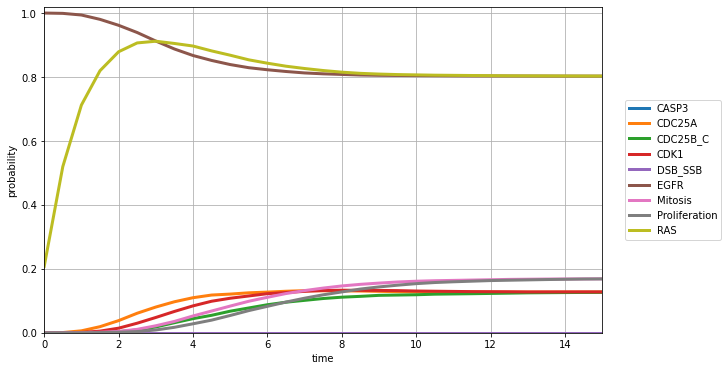

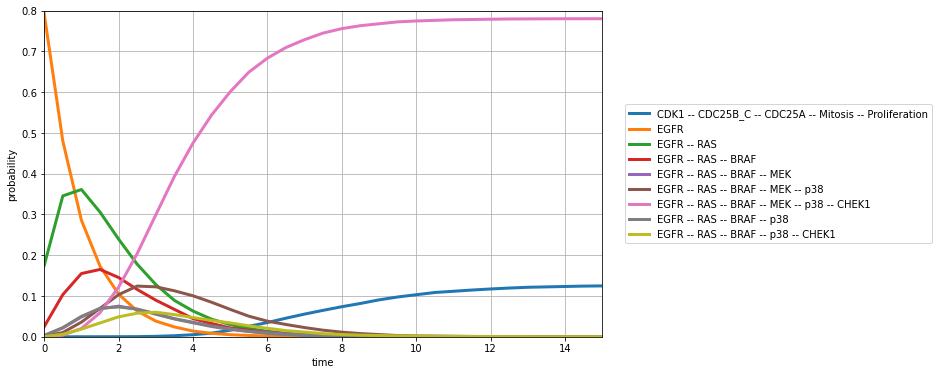

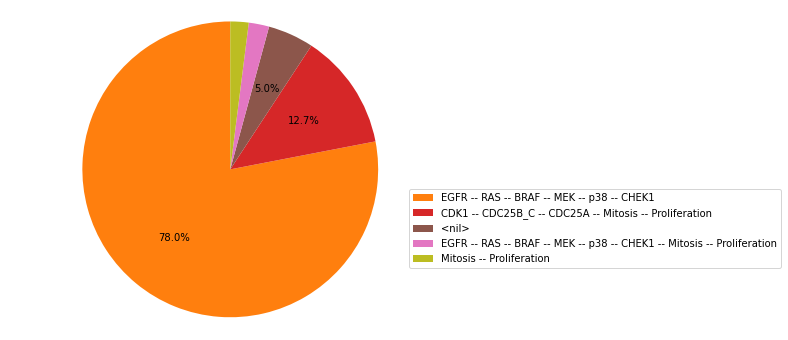

In [426]:
# plot node dynamics
# nodes_probtraj_df=pd.DataFrame(master_results.get_nodes_probtraj())
fig_pars=[3,10,6,"time","probability",15]; 
nodes_string=['EGFR','RAS','CDK1','CDC25A','CDC25B_C','DSB_SSB','Mitosis','Proliferation','CASP3']
plot_node_dynamics(run_WT_allinputs,nodes_string,fig_pars); plt.grid(); plt.ylim([0,1.02])

plot_states_larger_prob_x(run_WT_allinputs,0.05,[3,10,6,"time","probability",15]); plt.ylim([0,0.8]); plt.grid()

run_WT_allinputs.plot_piechart(); fig_state_piechart=plt.gcf(); fig_state_piechart.set_size_inches(8,6);

### trajectories of states

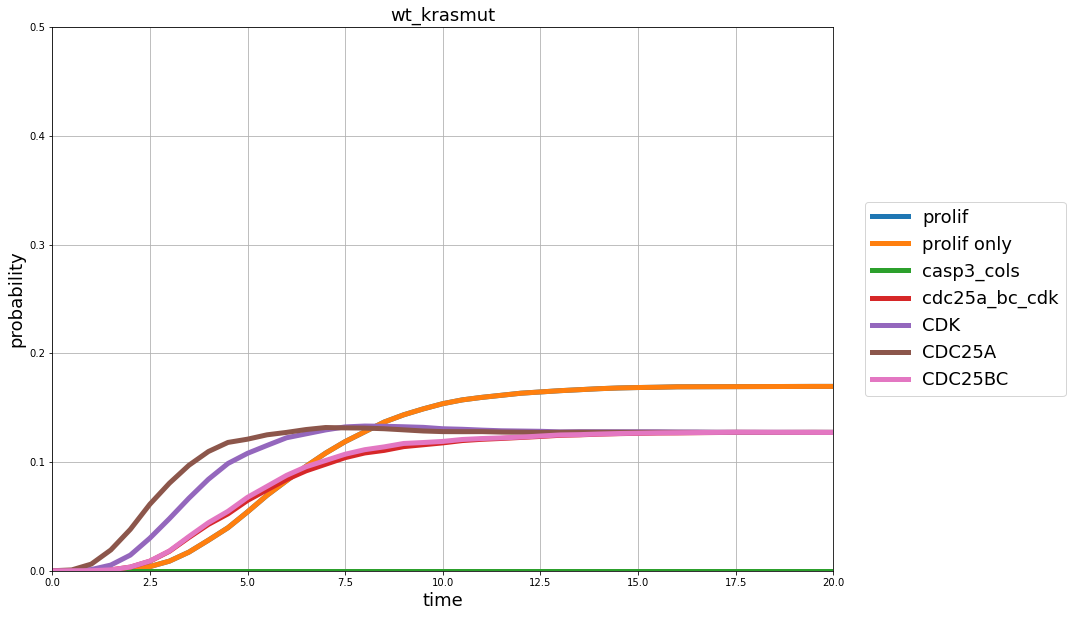

In [427]:
states_probtraj_wt=run_WT_allinputs.get_states_probtraj()
string_cellfates=["Prolif","CASP3","CDK","CDC25A","CDC25B"]
cellfate_truthvals=fcn_truthval_states(states_probtraj_wt,string_cellfates)
[prolif_cols,casp3_cols,CDK_cols,CDC25A_cols,CDC25BC_cols]=cellfate_truthvals
list_truthval=[prolif_cols,prolif_cols&~casp3_cols,casp3_cols,CDK_cols&CDC25A_cols&CDC25BC_cols,\
               CDK_cols,CDC25A_cols,CDC25BC_cols]
list_labels=["prolif","prolif only","casp3_cols","cdc25a_bc_cdk","CDK","CDC25A","CDC25BC"]
str_plotname="_krasmut"; plot_pars=[14,10,18,5,0.5,20]; model_name='wt'
plot_cell_fates(states_probtraj_wt,model_name,str_plotname,plot_pars,list_truthval,list_labels,""); plt.grid()

## KRAS mutation

In [428]:
krasmut=maboss.copy_and_mutate(WT,["RAS"],"ON"); 
# mut_CHEKi = mut_BRAF_ON.copy(); mut_CHEKi.mutate("CHEK1", "OFF")
krasmut.get_initial_state()
krasmut_run=krasmut.run()

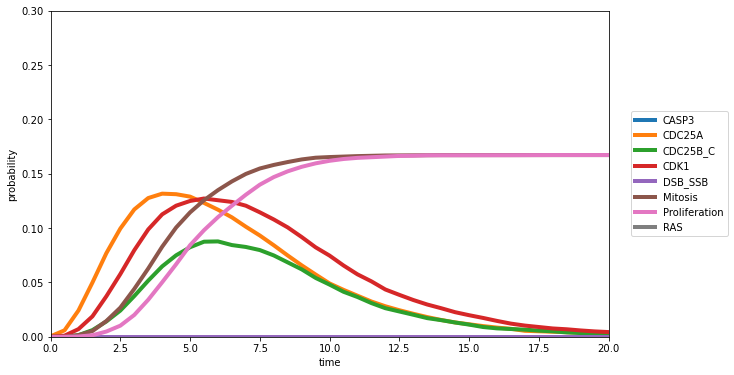

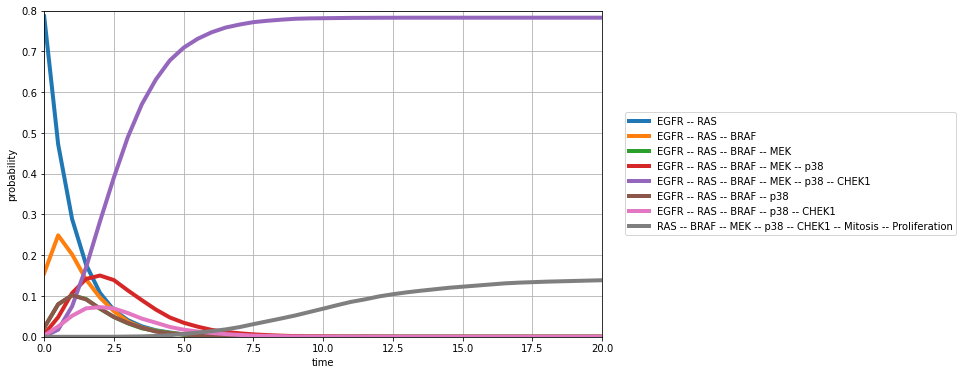

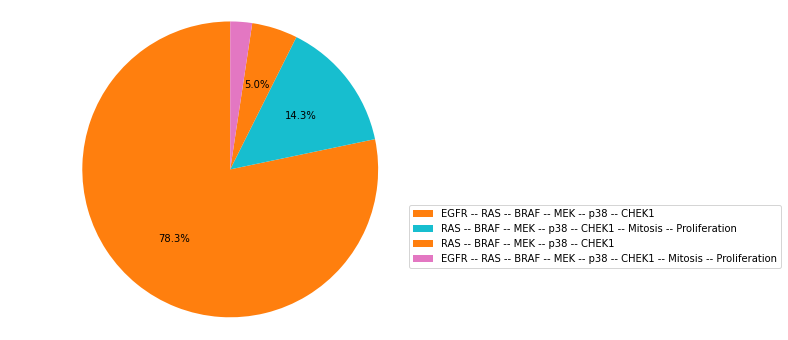

In [429]:
fig_pars=[4,10,6,"time","probability",20]; 
nodes_string=['CDK1','CDC25A','CDC25B_C','DSB_SSB','RAS','Mitosis','Proliferation','CASP3']
plot_node_dynamics(krasmut_run,nodes_string,fig_pars); plt.ylim([0,0.3])

plot_states_larger_prob_x(krasmut_run,0.05,[4,10,6,"time","probability",20]); plt.ylim([0,0.8]); plt.grid()

# plot_states_larger_prob_x(krasmut_run,0.05,[3,10,6,"time","probability",20])
krasmut_run.plot_piechart(); fig_state_piechart=plt.gcf(); fig_state_piechart.set_size_inches(8,6);

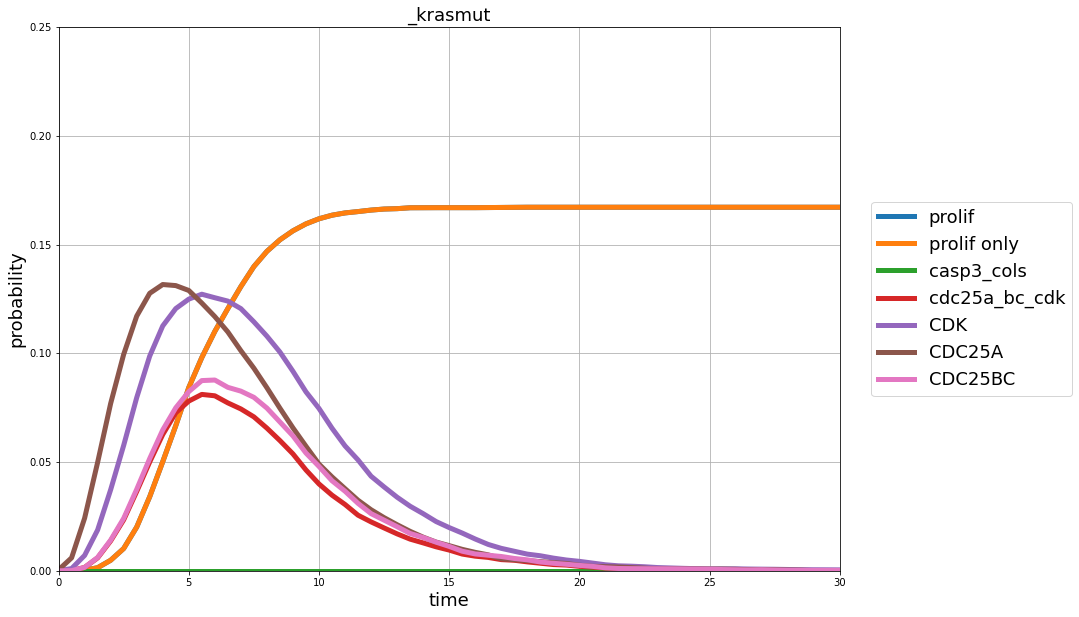

In [430]:
# krasmut_nodnadam_model=krasmut_run.copy() # maboss.copy_and_mutate(mutant_simulation, ["K_N_HRAS"], "ON")
# turn off DNA damage
# krasmut_nodnadam_model.network.set_istate("DSB_SSB",[1,0]);krasmut_nodnadam_results=krasmut_nodnadam_model.run()
states_probtraj_krasmut=krasmut_run.get_states_probtraj()

string_cellfates=["Prolif","CASP3","CDK","CDC25A","CDC25B"]
cellfate_truthvals=fcn_truthval_states(states_probtraj_krasmut,string_cellfates)
[prolif_cols,casp3_cols,CDK_cols,CDC25A_cols,CDC25BC_cols]=cellfate_truthvals
list_truthval=[prolif_cols,prolif_cols&~casp3_cols,casp3_cols,CDK_cols&CDC25A_cols&CDC25BC_cols,\
               CDK_cols,CDC25A_cols,CDC25BC_cols]
list_labels=["prolif","prolif only","casp3_cols","cdc25a_bc_cdk","CDK","CDC25A","CDC25BC"]
str_plotname="_krasmut"; plot_pars=[14,10,18,5,0.25,30]; model_name=''
plot_cell_fates(states_probtraj_krasmut,model_name,str_plotname,plot_pars,list_truthval,list_labels,""); plt.grid()

# KRASmut+DNA damage

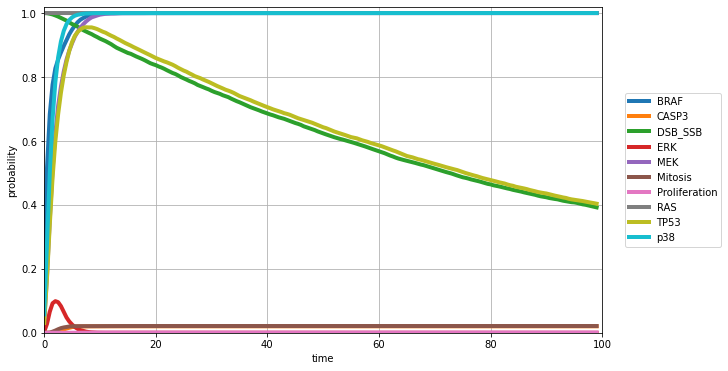

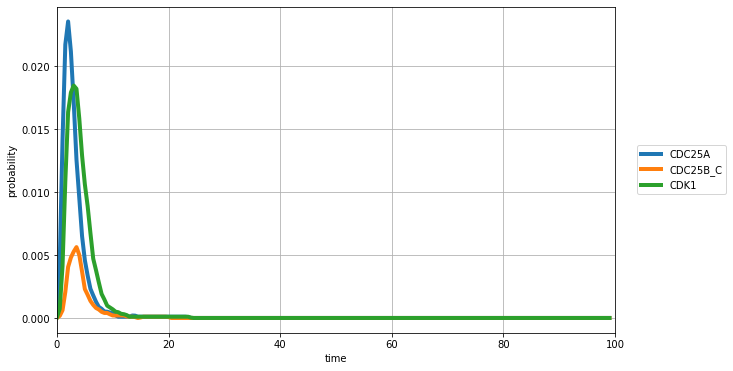

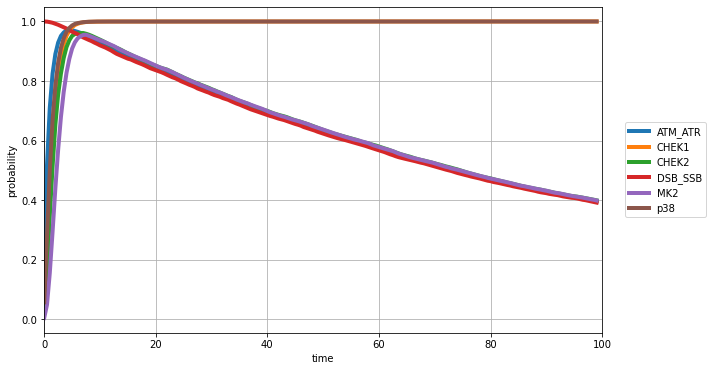

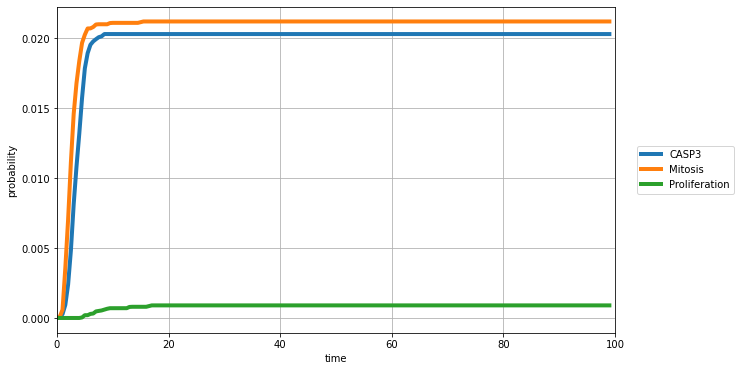

In [432]:
krasmut_dnadam=maboss.copy_and_mutate(WT, ["RAS"], "ON"); 
# krasmut_chek1off.mutate("CHEK1","OFF")
krasmut_dnadam.network.set_istate('DSB_SSB',[0,1])
krasmut_dnadam_run=krasmut_dnadam.run()
# krasmut_dnadam.get_initial_state()
fig_pars=[4,10,6,"time","probability",1e2]; 
nodes_string=['RAS','BRAF','MEK','ERK','p38','DSB_SSB','TP53','Mitosis','Proliferation','CASP3']
plot_node_dynamics(krasmut_dnadam_run,nodes_string,fig_pars); plt.grid(); plt.ylim([0,1.02])
plot_node_dynamics(krasmut_dnadam_run,['CDK1','CDC25A','CDC25B_C'],fig_pars); plt.grid()
plot_node_dynamics(krasmut_dnadam_run,['p38','CHEK1','CHEK2','MK2','ATM_ATR','DSB_SSB'],fig_pars); plt.grid()
plot_node_dynamics(krasmut_dnadam_run,['Mitosis','Proliferation','CASP3'],fig_pars); plt.grid()

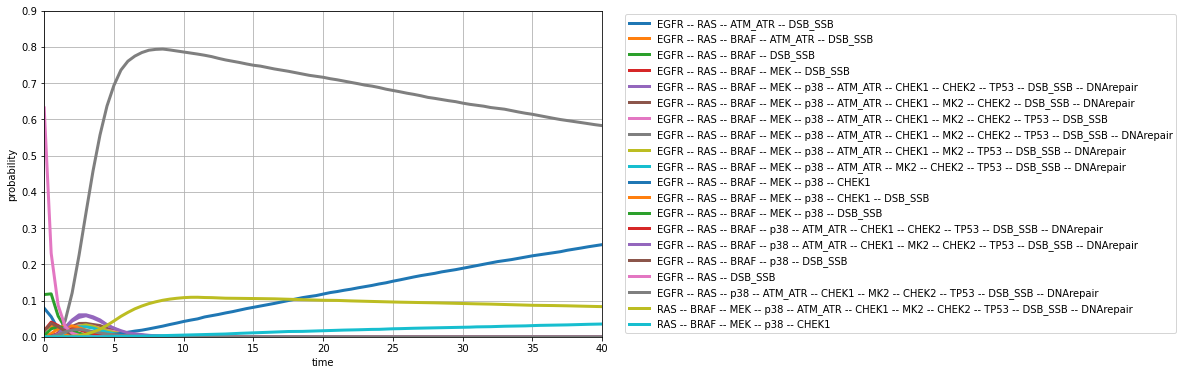

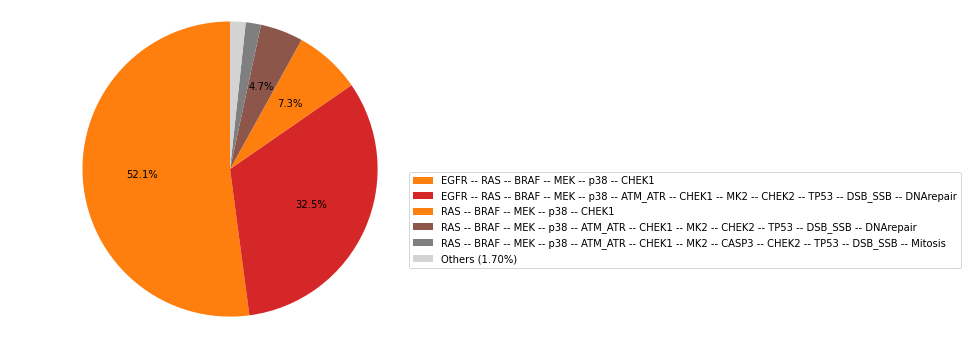

In [433]:
plot_states_larger_prob_x(krasmut_dnadam_run,0.02,[3,10,6,"time","probability",40])
plt.grid(); plt.ylim([0,0.9])
krasmut_dnadam_run.plot_piechart(); fig_state_piechart=plt.gcf(); fig_state_piechart.set_size_inches(8,6);


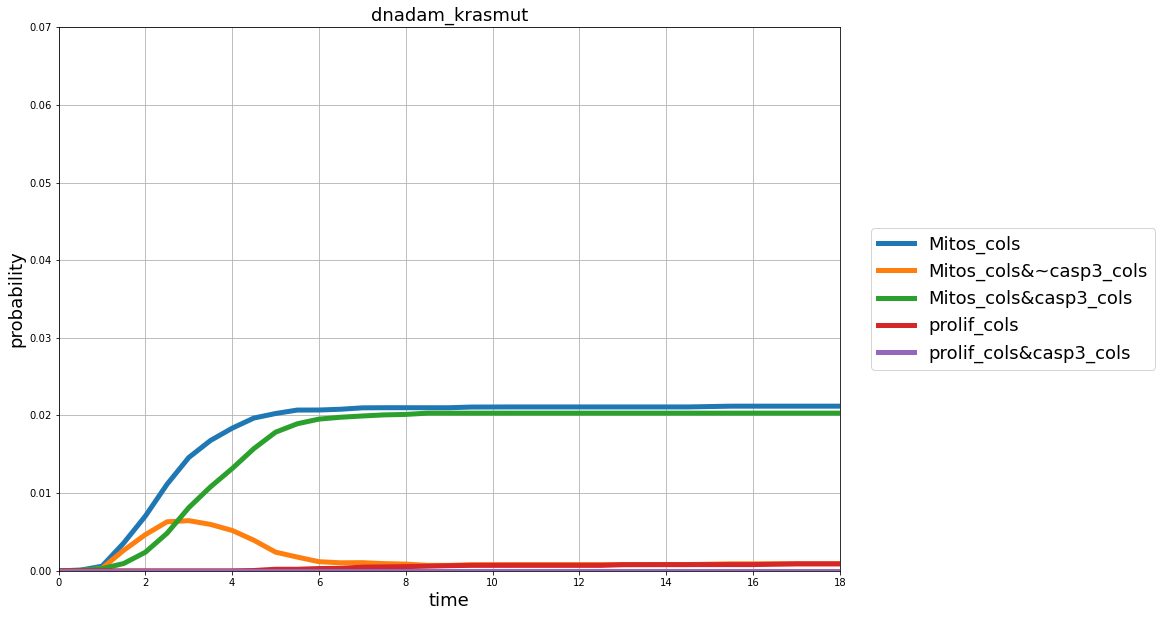

In [434]:
states_probtraj_krasmut_dnadam=krasmut_dnadam_run.get_states_probtraj()

string_cellfates=["Prolif","CASP3","DSB_SSB","Mitos"]
cellfate_truthvals=fcn_truthval_states(states_probtraj_krasmut_dnadam,string_cellfates)
[prolif_cols,casp3_cols,dsb_ssb_cols,Mitos_cols]=cellfate_truthvals
list_truthval=[Mitos_cols,\
               Mitos_cols&~casp3_cols,\
               Mitos_cols&casp3_cols,\
              prolif_cols,\
              prolif_cols&casp3_cols]
list_labels=["Mitos_cols",\
             "Mitos_cols&~casp3_cols",\
             "Mitos_cols&casp3_cols",\
            "prolif_cols",\
            "prolif_cols&casp3_cols"]
str_plotname="_krasmut"; plot_pars=[14,10,18,5,0.07,18]; model_name='dnadam'
plot_cell_fates(states_probtraj_krasmut_dnadam,model_name,str_plotname,plot_pars,list_truthval,list_labels,"")
plt.grid()

In [435]:
np.sum(states_probtraj_krasmut_dnadam.iloc[-1,casp3_cols])


0.0203

# KRASMUT + DNADAM + CHEK1off

(0.0, 1.02)

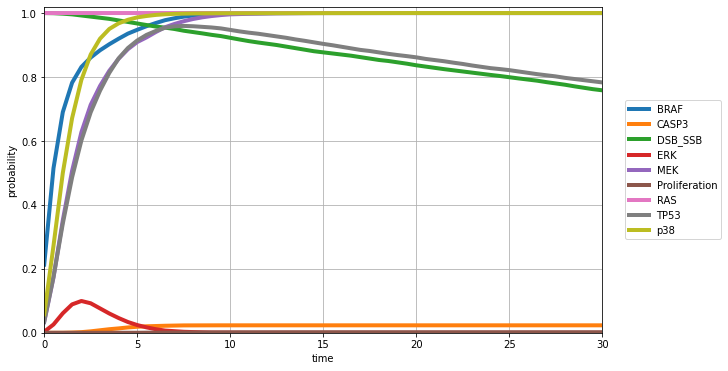

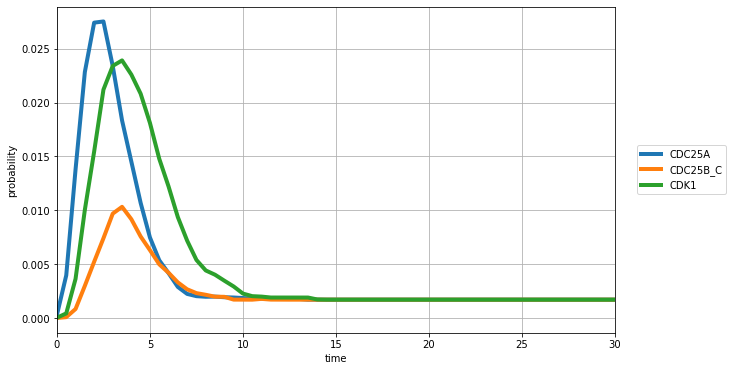

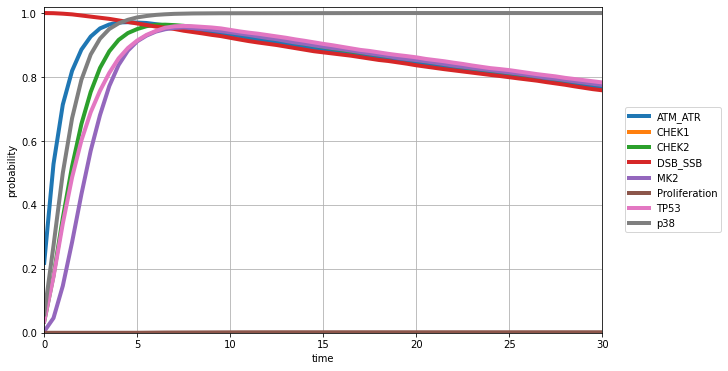

In [436]:
krasmut_dnadam_chek1off=maboss.copy_and_mutate(WT, ["RAS"], "ON"); 
krasmut_dnadam_chek1off.mutate("CHEK1","OFF")
krasmut_dnadam_chek1off.network.set_istate('DSB_SSB',[0,1]);krasmut_dnadam_chek1off.network.set_istate('RAS',[0,1])
krasmut_dnadam_chek1off_run=krasmut_dnadam_chek1off.run()

fig_pars=[4,10,6,"time","probability",30]; 
# nodes_string=['CDK1','CDC25A','CDC25B_C','DSB_SSB','RAS','Proliferation','CASP3']
# plot_node_dynamics(krasmut_dnadam_chek1off_run,nodes_string,fig_pars); plt.grid(); plt.ylim([0,1.01])
nodes_string=['RAS','BRAF','MEK','ERK','p38','DSB_SSB','TP53','Proliferation','CASP3']
plot_node_dynamics(krasmut_dnadam_chek1off_run,nodes_string,fig_pars); plt.grid(); plt.ylim([0,1.02])
plot_node_dynamics(krasmut_dnadam_chek1off_run,['CDK1','CDC25A','CDC25B_C'],fig_pars); plt.grid()
plot_node_dynamics(krasmut_dnadam_chek1off_run,['p38','CHEK1','CHEK2','MK2','ATM_ATR',\
                          'TP53','DSB_SSB','Proliferation'],fig_pars); plt.grid(); plt.ylim([0,1.02])

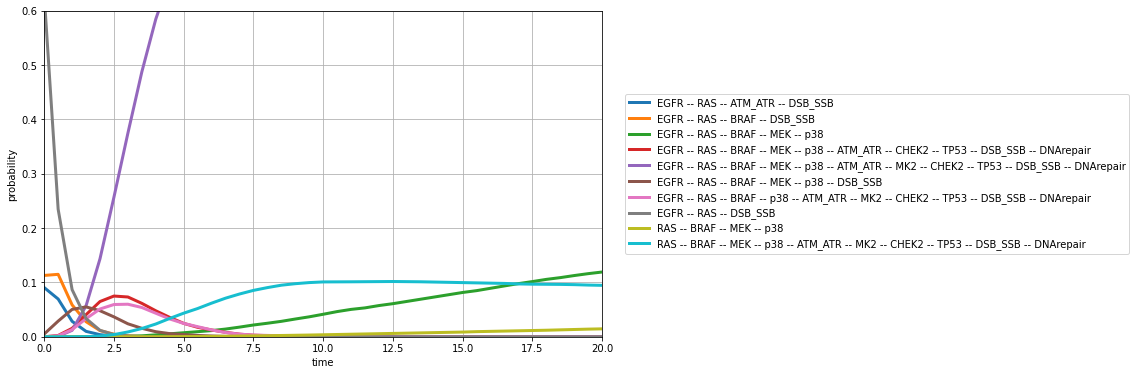

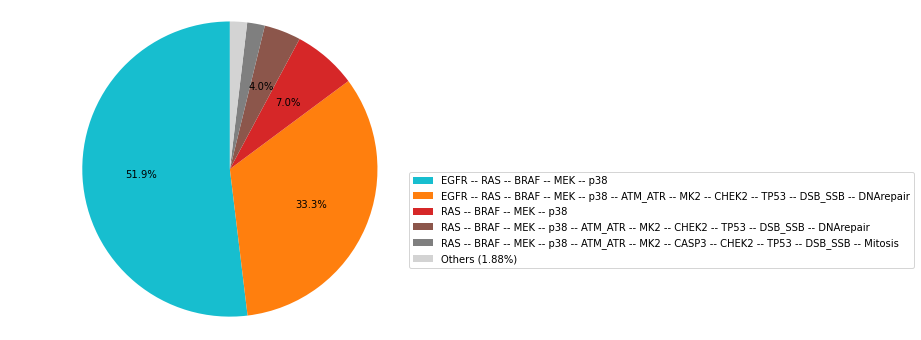

In [437]:
plot_states_larger_prob_x(krasmut_dnadam_chek1off_run,0.05,[3,10,6,"time","probability",20])
plt.grid(); plt.ylim([0,0.6])
krasmut_dnadam_chek1off_run.plot_piechart(); fig_state_piechart=plt.gcf(); fig_state_piechart.set_size_inches(8,6);


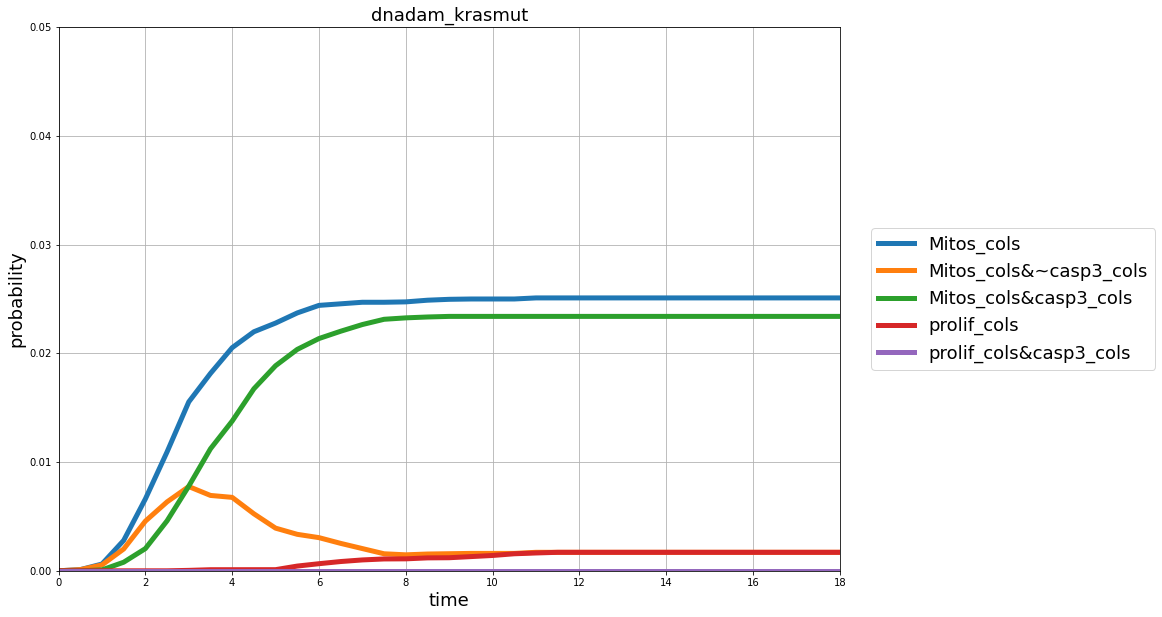

In [438]:
states_probtraj_krasmut_dnadam_chek1off=krasmut_dnadam_chek1off_run.get_states_probtraj()

string_cellfates=["Prolif","CASP3","Mitosis","TP53"]
cellfate_truthvals=fcn_truthval_states(states_probtraj_krasmut_dnadam_chek1off,string_cellfates)
[prolif_cols,casp3_cols,Mitos_cols,tp53_cols]=cellfate_truthvals
list_truthval=[Mitos_cols,\
               Mitos_cols&~casp3_cols,\
               Mitos_cols&casp3_cols,\
              prolif_cols,\
              prolif_cols&casp3_cols]
list_labels=["Mitos_cols",\
              "Mitos_cols&~casp3_cols",\
              "Mitos_cols&casp3_cols",\
              "prolif_cols",\
              "prolif_cols&casp3_cols"]
str_plotname="_krasmut"; plot_pars=[14,10,18,5,0.05,18]; model_name='dnadam'
plot_cell_fates(states_probtraj_krasmut_dnadam_chek1off,model_name,\
                str_plotname,plot_pars,list_truthval,list_labels,"")
plt.grid()

In [439]:
np.sum(states_probtraj_krasmut_dnadam_chek1off.iloc[-1,casp3_cols])

0.0234

# KRASMUT + DNADAM + MK2off

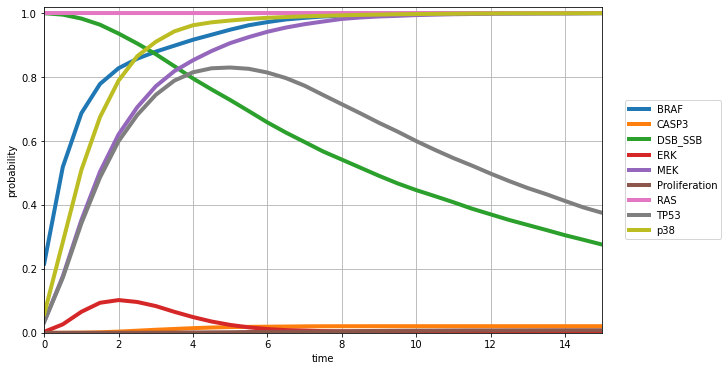

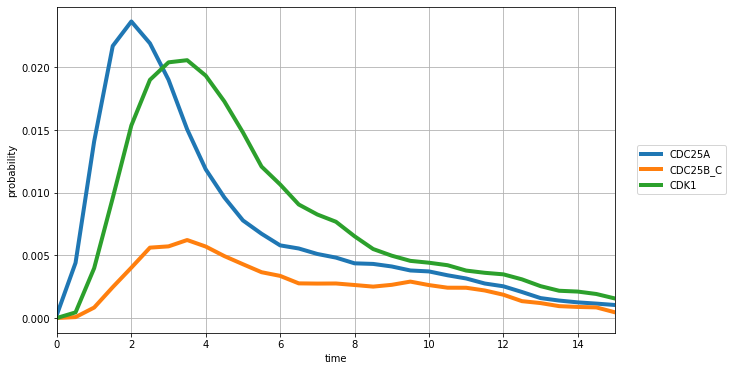

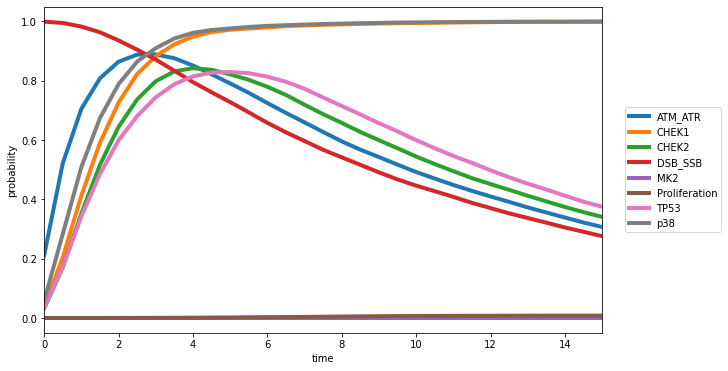

In [385]:
krasmut_dnadam_mk2off=maboss.copy_and_mutate(WT, ["RAS"], "ON"); 
krasmut_dnadam_mk2off.mutate("MK2","OFF")
krasmut_dnadam_mk2off.network.set_istate('DSB_SSB',[0,1]);krasmut_dnadam_mk2off.network.set_istate('RAS',[0,1])
krasmut_dnadam_mk2off_run=krasmut_dnadam_mk2off.run()

fig_pars=[4,10,6,"time","probability",15]; 
# nodes_string=['CDK1','CDC25A','CDC25B_C','DSB_SSB','RAS','Proliferation','CASP3']
# plot_node_dynamics(krasmut_dnadam_mk2off_run,nodes_string,fig_pars); plt.grid(); plt.ylim([0,1.01])
nodes_string=['RAS','BRAF','MEK','ERK','p38','DSB_SSB','TP53','Proliferation','CASP3']
plot_node_dynamics(krasmut_dnadam_mk2off_run,nodes_string,fig_pars); plt.grid(); plt.ylim([0,1.02])
plot_node_dynamics(krasmut_dnadam_mk2off_run,['CDK1','CDC25A','CDC25B_C'],fig_pars); plt.grid()
plot_node_dynamics(krasmut_dnadam_mk2off_run,['p38','CHEK1','CHEK2','MK2','ATM_ATR',\
                                                'TP53','DSB_SSB','Proliferation'],fig_pars); 

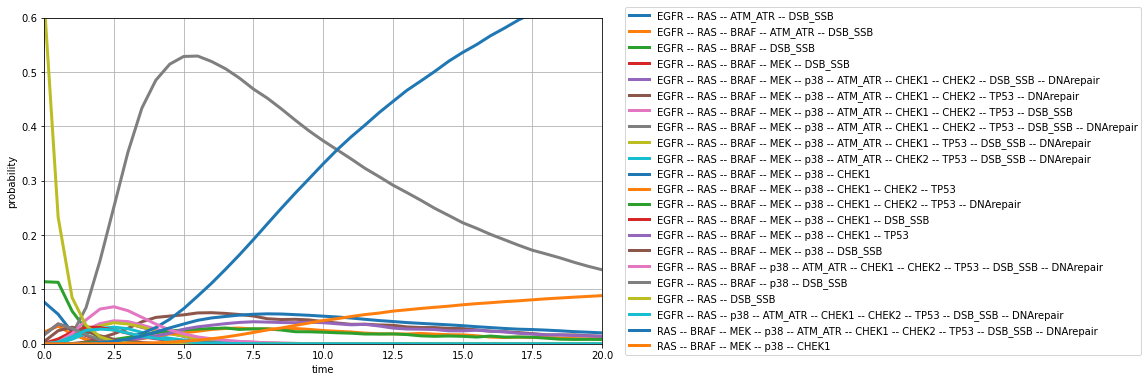

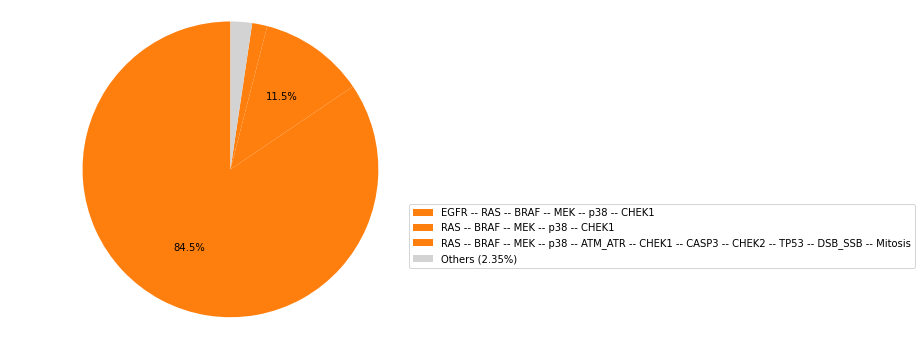

In [386]:
plot_states_larger_prob_x(krasmut_dnadam_mk2off_run,0.025,[3,10,6,"time","probability",20])
plt.grid(); plt.ylim([0,0.6])
krasmut_dnadam_mk2off_run.plot_piechart(); fig_state_piechart=plt.gcf(); fig_state_piechart.set_size_inches(8,6);


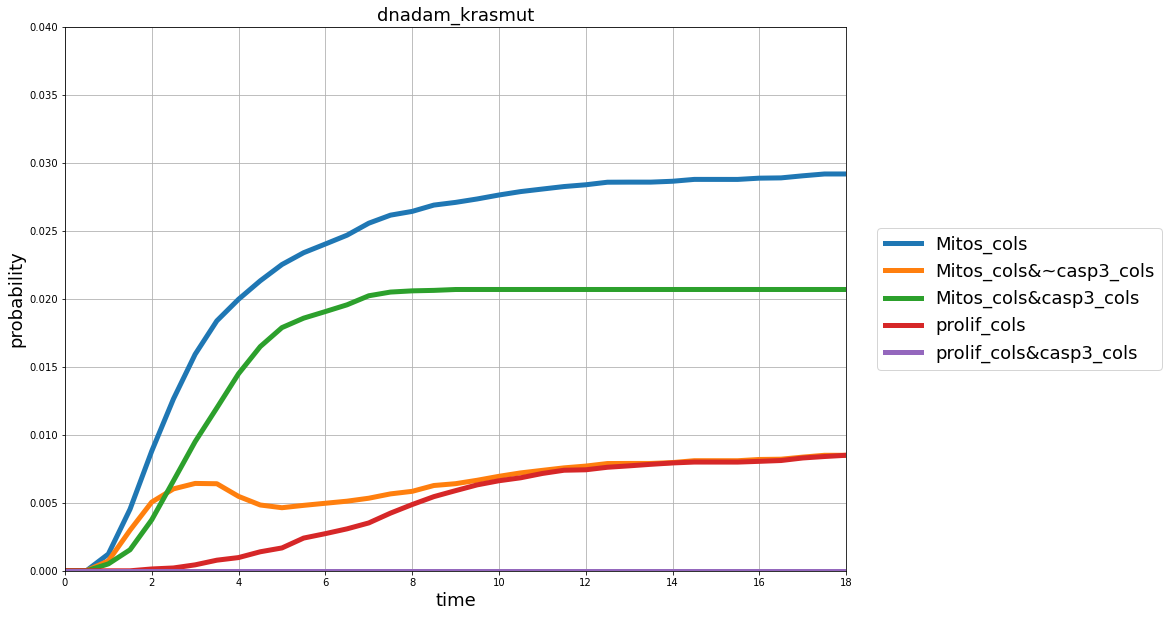

In [389]:
states_probtraj_krasmut_dnadam_mk2off=krasmut_dnadam_mk2off_run.get_states_probtraj()

string_cellfates=["Prolif","CASP3","Mitosis","TP53"]
cellfate_truthvals=fcn_truthval_states(states_probtraj_krasmut_dnadam_mk2off,string_cellfates)
[prolif_cols,casp3_cols,Mitos_cols,tp53_cols]=cellfate_truthvals
list_truthval=[Mitos_cols,\
               Mitos_cols&~casp3_cols,\
               Mitos_cols&casp3_cols,\
              prolif_cols,\
              prolif_cols&casp3_cols]
list_labels=["Mitos_cols",\
               "Mitos_cols&~casp3_cols",\
               "Mitos_cols&casp3_cols",\
              "prolif_cols",\
              "prolif_cols&casp3_cols"]
str_plotname="_krasmut"; plot_pars=[14,10,18,5,0.04,18]; model_name='dnadam'
plot_cell_fates(states_probtraj_krasmut_dnadam_mk2off,model_name,\
                str_plotname,plot_pars,list_truthval,list_labels,"")
plt.grid()

# prolif_cols,\
#             prolif_cols&~casp3_cols,\
#              casp3_cols,\
#               casp3_cols&prolif_cols,\
#               dsb_ssb_cols&prolif_cols,\
#               ~dsb_ssb_cols&tp53_cols&casp3_cols,\
#              dsb_ssb_cols&tp53_cols&casp3_cols,\
#              dsb_ssb_cols&~tp53_cols&casp3_cols

In [390]:
np.sum(states_probtraj_krasmut_dnadam_mk2off.iloc[-1,casp3_cols])

0.020700000000000003

# KRASMUT + DNADAM + CHEK1off + MK2off

(0.0, 1.02)

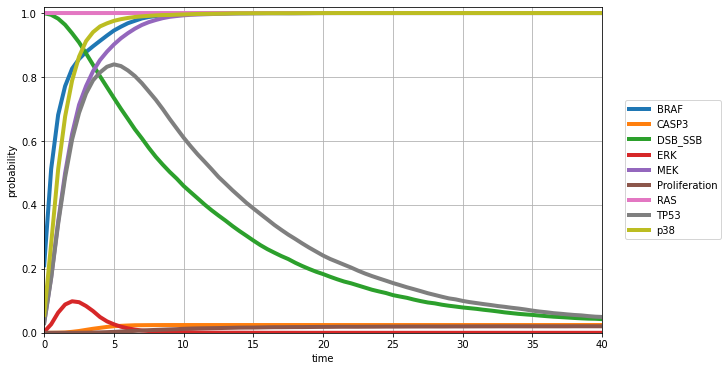

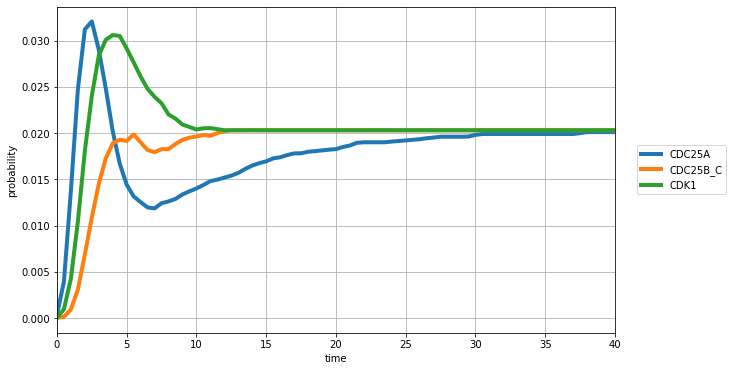

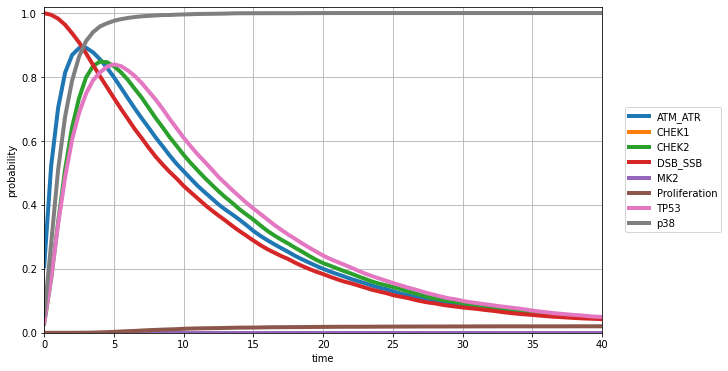

In [391]:
krasmut_dnadam_chek1mk2off=maboss.copy_and_mutate(WT, ["RAS"], "ON"); 
krasmut_dnadam_chek1mk2off.mutate("MK2","OFF"); krasmut_dnadam_chek1mk2off.mutate("CHEK1","OFF")
krasmut_dnadam_chek1mk2off.network.set_istate('DSB_SSB',[0,1]);
krasmut_dnadam_chek1mk2off.network.set_istate('RAS',[0,1])
krasmut_dnadam_chek1mk2off_run=krasmut_dnadam_chek1mk2off.run()

fig_pars=[4,10,6,"time","probability",40]; 
nodes_string=['RAS','BRAF','MEK','ERK','p38','DSB_SSB','TP53','Proliferation','CASP3']
# krasmut_dnadam_chek1mk2off.get_mutations()
# krasmut_dnadam_chek1mk2off.get_initial_state()
plot_node_dynamics(krasmut_dnadam_chek1mk2off_run,nodes_string,fig_pars); plt.grid(); plt.ylim([0,1.02])
plot_node_dynamics(krasmut_dnadam_chek1mk2off_run,['CDK1','CDC25A','CDC25B_C'],fig_pars); plt.grid()
plot_node_dynamics(krasmut_dnadam_chek1mk2off_run,['p38','CHEK1','CHEK2','MK2','ATM_ATR',\
                               'TP53','DSB_SSB','Proliferation'],fig_pars); plt.grid(); plt.ylim([0,1.02])

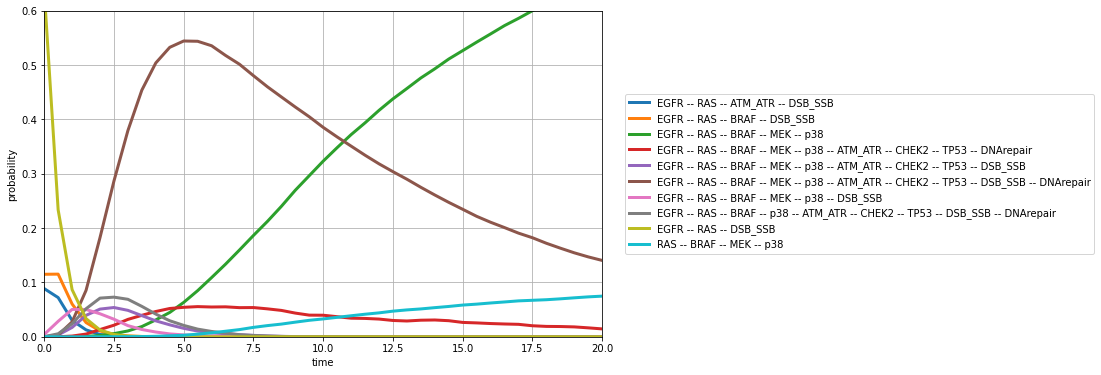

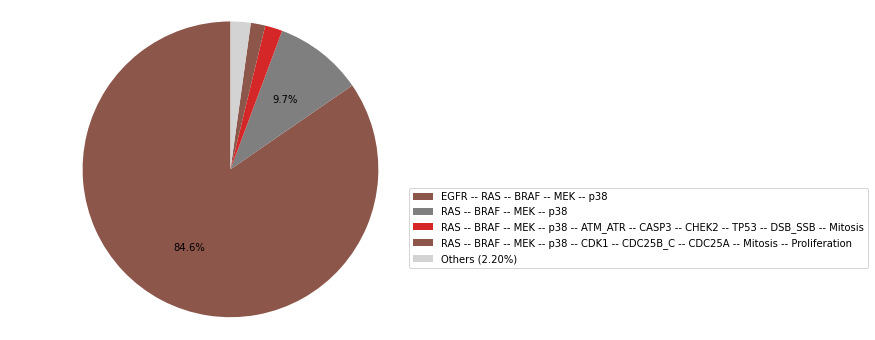

In [392]:
plot_states_larger_prob_x(krasmut_dnadam_chek1mk2off_run,0.05,[3,10,6,"time","probability",20])
plt.grid(); plt.ylim([0,0.6])
krasmut_dnadam_chek1mk2off_run.plot_piechart(); fig_state_piechart=plt.gcf(); fig_state_piechart.set_size_inches(8,6);


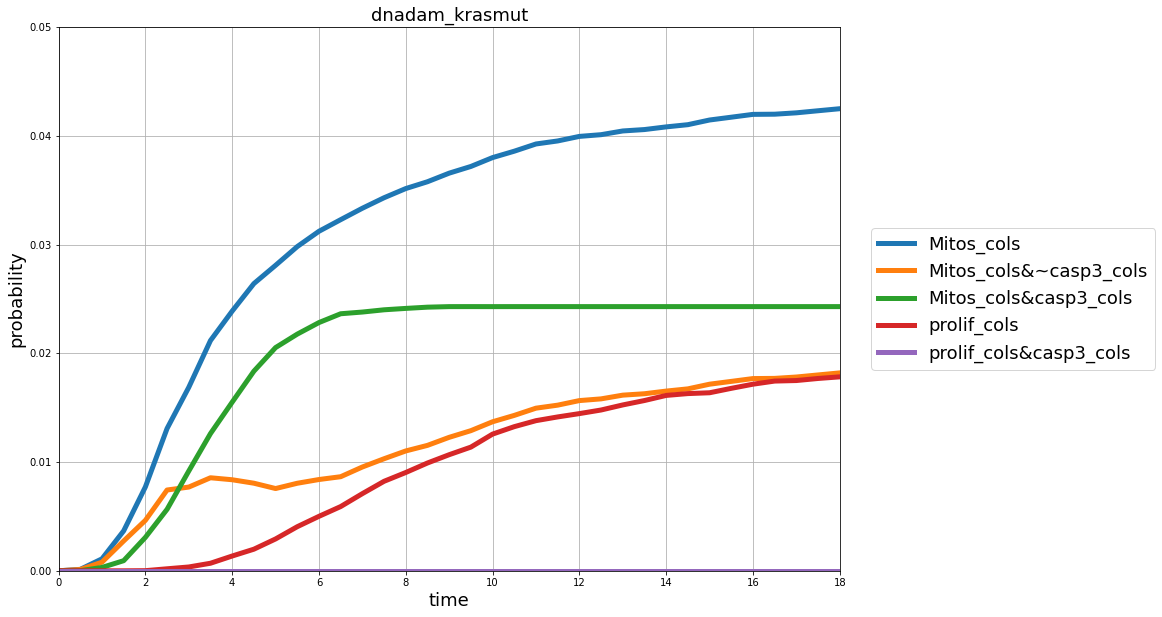

In [393]:
states_probtraj_krasmut_dnadam_chek1mk2off=krasmut_dnadam_chek1mk2off_run.get_states_probtraj()

string_cellfates=["Prolif","CASP3","Mitosis","TP53"]
cellfate_truthvals=fcn_truthval_states(states_probtraj_krasmut_dnadam_chek1mk2off,string_cellfates)
[prolif_cols,casp3_cols,Mitos_cols,tp53_cols]=cellfate_truthvals
list_truthval=[Mitos_cols,\
               Mitos_cols&~casp3_cols,\
               Mitos_cols&casp3_cols,\
              prolif_cols,\
              prolif_cols&casp3_cols]
list_labels=["Mitos_cols",\
               "Mitos_cols&~casp3_cols",\
               "Mitos_cols&casp3_cols",\
              "prolif_cols",\
              "prolif_cols&casp3_cols"]
str_plotname="_krasmut"; plot_pars=[14,10,18,5,0.05,18]; model_name='dnadam'
plot_cell_fates(states_probtraj_krasmut_dnadam_chek1mk2off,model_name,\
                str_plotname,plot_pars,list_truthval,list_labels,"")
plt.grid()

In [394]:
np.sum(states_probtraj_krasmut_dnadam_chek1mk2off.iloc[-1,casp3_cols])

0.024300000000000002

In [395]:
krasmut_dnadam_run.get_last_nodes_probtraj()

,ATM_ATR,BRAF,CASP3,CHEK1,CHEK2,DNArepair,DSB_SSB,EGFR,MEK,MK2,Mitosis,Proliferation,RAS,TP53,p38
49.0000,0.024062,1.000001,0.0154,1.000001,0.025317,0.011391,0.023107,0.861601,1.000001,0.025274,0.0258,0.0104,1.000001,0.026676,1.000001


# All results as one

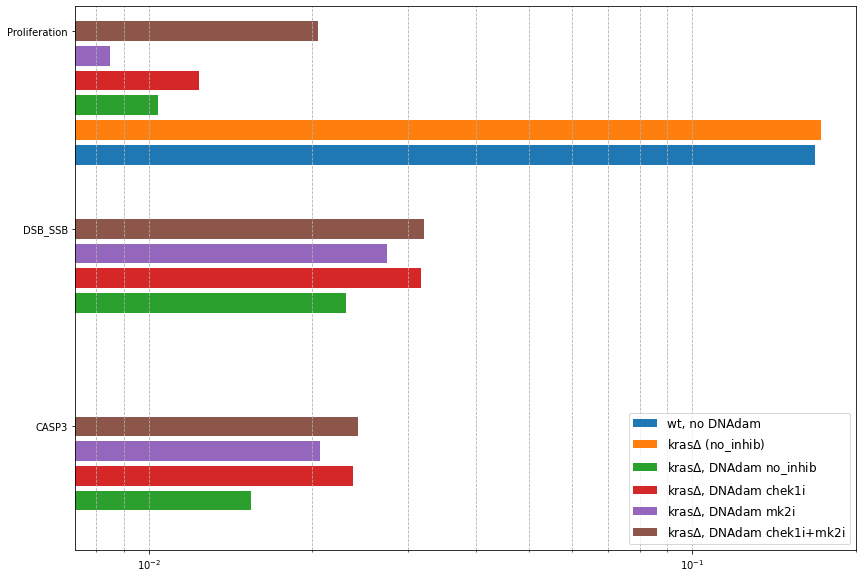

In [408]:
# plot the different mutants on subplots

# run_WT_allinputs,
# krasmut_run,krasmut_dnadam_run,
# krasmut_dnadam_chek1off_run,krasmut_dnadam_mk2off_run,krasmut_dnadam_chek1mk2off_run
kras_all_conds_lastnodes_prob=pd.concat([
           run_WT_allinputs.get_last_nodes_probtraj(),
           krasmut_run.get_last_nodes_probtraj(),
           krasmut_dnadam_run.get_last_nodes_probtraj(),
           krasmut_dnadam_chek1off_run.get_last_nodes_probtraj(), 
           krasmut_dnadam_mk2off_run.get_last_nodes_probtraj(), 
           krasmut_dnadam_chek1mk2off_run.get_last_nodes_probtraj()],ignore_index=True,sort=True)
kras_all_conds_lastnodes_prob.replace(np.nan,0)
barplot_titles=["wt, no DNAdam","kras$\Delta$ (no_inhib)","kras$\Delta$, DNAdam no_inhib",
                "kras$\Delta$, DNAdam chek1i",
                "kras$\Delta$, DNAdam mk2i","kras$\Delta$, DNAdam chek1i+mk2i"]
sel_nodes=['CASP3','Proliferation','DSB_SSB'] # ,'SSB','mit'
truthvals=kras_all_conds_lastnodes_prob.columns.str.contains(str.join("|",sel_nodes))

r1 = np.arange(np.sum(truthvals))*8

plt.figure(figsize=(plot_pars[0],plot_pars[1]));
for n in range(0,np.shape(kras_all_conds_lastnodes_prob)[0],1):
    last_nodes=kras_all_conds_lastnodes_prob.iloc[[n]].loc[:,truthvals]
    # if n==(np.shape(kras_all_conds_lastnodes_prob)[0]-1):
    #    tick_label_str=last_nodes.columns
    # else:
    #    tick_label_str=""   
    plt.barh(r1+n*1,last_nodes.values[0],tick_label=last_nodes.columns)

fontsize_val=12; plt.legend(barplot_titles,loc="lower right",fontsize=12)
# plt.savefig("figures/"+model_name+"krasmut_dnadam_all.png",bbox_inches='tight')
plt.ylim([0,22]); plt.xscale('log'); plt.grid(which='both',axis="x",ls='--') 

In [397]:
kras_all_conds_lastnodes_prob.iloc[[n]].loc[:,truthvals]
last_nodes.columns
kras_all_conds_lastnodes_prob

,ATM_ATR,BRAF,CASP3,CDC25A,CDC25B_C,CDK1,CHEK1,CHEK2,DNArepair,DSB_SSB,EGFR,MEK,MK2,Mitosis,Proliferation,RAS,TP53,p38
0,NaN,0.807000,NaN,0.1250,0.1250,0.1250,0.807000,NaN,NaN,NaN,0.807000,0.807000,NaN,0.1680,0.1680,0.807000,NaN,0.807000
1,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.798600,1.000000,NaN,0.1722,0.1722,1.000000,NaN,1.000000
2,0.024062,1.000001,0.0154,NaN,NaN,NaN,1.000001,0.025317,0.011391,0.023107,0.861601,1.000001,0.025274,0.0258,0.0104,1.000001,0.026676,1.000001
3,0.032987,1.000000,0.0238,0.0113,0.0113,0.0113,NaN,0.034097,0.011571,0.031694,0.864900,1.000000,0.034473,0.0362,0.0124,1.000000,0.035119,1.000000
4,0.028526,1.000001,0.0207,NaN,NaN,NaN,1.000001,0.029304,0.009704,0.027444,0.858201,1.000001,NaN,0.0292,0.0085,1.000001,0.030484,1.000001
5,0.032807,1.000001,0.0243,0.0202,0.0203,0.0203,NaN,0.033535,0.010804,0.032144,0.864700,1.000001,NaN,0.0448,0.0205,1.000001,0.034805,1.000001


In [ ]:
# SET INITSTATE
# cellfate_model.network.set_istate(['kras','dnadam','dnarep','chek1','mitosis','celldeath'],
#                           {(0,1,0,0,0,0):1/2,(1,0,0,0,0,0):1/2})
#
# testNet.set_istate('DNAdam', [0.4, 0.6])
# 
# SET PARAMETERS
krasmut_dnadam_chek1chek2off_mk2off_model.param["$d_DSB_SSB"]=0.1
krasmut_dnadam_chek1chek2off_mk2off_model.param["$d_DSB_SSB"]
